In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from seaborn import load_dataset
titanic = load_dataset(name="titanic")

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic.drop(['deck'],axis=1,inplace=True)

In [10]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
titanic['embark_town'].mode()

0    Southampton
dtype: object

In [14]:
titanic["embark_town"] = titanic['embark_town'].replace(to_replace=np.nan,value="Southampton")

In [15]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

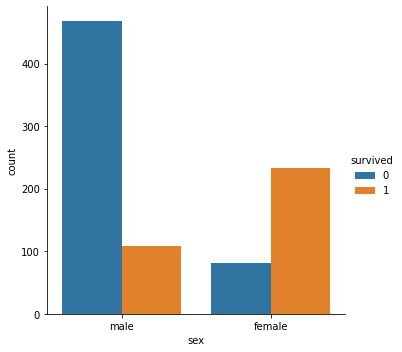

In [22]:
sns.catplot(x="sex",hue="survived",kind="count",data=titanic)

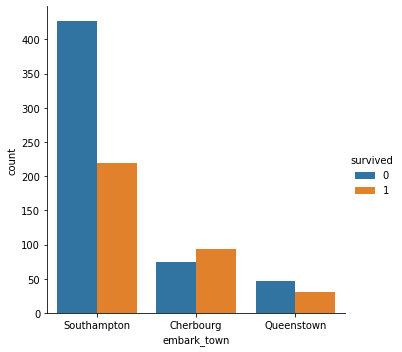

In [26]:
sns.catplot(x="embark_town",hue="survived",kind="count",data=titanic)

<AxesSubplot:xlabel='fare', ylabel='Count'>

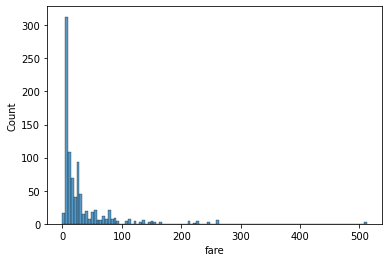

In [27]:
sns.histplot(titanic["fare"])

In [29]:
group = titanic.groupby(['pclass', 'survived'])


In [35]:
pclass_survived = group.size().unstack()

<AxesSubplot:xlabel='survived', ylabel='pclass'>

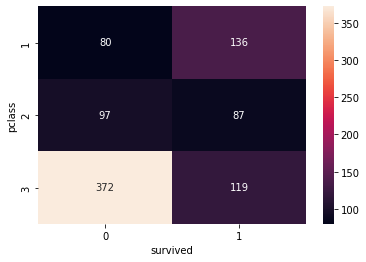

In [40]:
sns.heatmap(pclass_survived, annot = True,fmt="d")